<a href="https://colab.research.google.com/github/pczajkowski128/machine-learning-bootcamp/blob/main/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello World')

Hello World


In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:

sklearn.__version__

'1.6.1'

In [4]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [5]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 372.0+ bytes


In [6]:
for col in ['size', 'color', 'gender', 'bought']:
  df[col] = df[col].astype('category')

df['weight'] = df['weight'].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 744.0 bytes


In [8]:
df.describe()

,price,weight
count,5.000000,5.000000
mean,119.000000,408.000000
std,48.476799,75.299402
min,79.000000,300.000000
25%,89.000000,380.000000
50%,99.000000,410.000000
75%,129.000000,450.000000
max,199.000000,500.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [10]:
df.describe(include = ['category']).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['bought'])
le.transform(df['bought'])

array([1, 0, 1, 0, 1])

In [12]:
le.fit_transform(df['bought'])

array([1, 0, 1, 0, 1])

In [13]:
le.classes_

array(['no', 'yes'], dtype=object)

In [14]:
df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [15]:
df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
encoder.fit(df[['size']])

OneHotEncoder(sparse_output=False)

In [17]:
encoded = encoder.fit_transform(df[['size']])

In [18]:
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [19]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [20]:
import pandas as pd
import numpy as np

In [21]:
df_test = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'color': ['red', 'blue', 'green', 'red', 'green'],
    'price': [100, 150, 200, 130, 120],
    'bought': ['yes', 'no', 'yes', 'yes', 'no']
})
df_test

,gender,color,price,bought
0,male,red,100,yes
1,female,blue,150,no
2,female,green,200,yes
3,male,red,130,yes
4,female,green,120,no


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  5 non-null      object
 1   color   5 non-null      object
 2   price   5 non-null      int64 
 3   bought  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [23]:
for col in ['gender', 'color', 'bought']:
  df_test[col] = df_test[col].astype('category')
df_test['price'] = df_test['price'].astype('float')
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  5 non-null      category
 1   color   5 non-null      category
 2   price   5 non-null      float64 
 3   bought  5 non-null      category
dtypes: category(3), float64(1)
memory usage: 567.0 bytes


In [24]:
from sklearn.preprocessing import LabelEncoder
lb_test = LabelEncoder()
lb_test.fit(df_test['bought'])
lb_test.classes_

array(['no', 'yes'], dtype=object)

In [25]:
df_test['bought'] = lb_test.fit_transform(df_test['bought'])
df_test

,gender,color,price,bought
0,male,red,100.0,1
1,female,blue,150.0,0
2,female,green,200.0,1
3,male,red,130.0,1
4,female,green,120.0,0


In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse_output= False)
ohe.fit(df_test[['color']])
ohe.categories_

[array(['blue', 'green', 'red'], dtype=object)]

In [27]:
ohe = ohe.transform(df_test[['color']])

In [28]:
ohe

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [29]:
pd.get_dummies(data = df_test).astype(int)

,price,bought,gender_female,gender_male,color_blue,color_green,color_red
0,100,1,0,1,0,0,1
1,150,0,1,0,1,0,0
2,200,1,1,0,0,1,0
3,130,1,0,1,0,0,1
4,120,0,1,0,0,1,0


In [30]:
df_test['bought'] = df_test['bought'].map({1:'True', 0:'False'})

In [31]:
pd.get_dummies(df_test, drop_first = True).astype('int')

,price,gender_male,color_green,color_red,bought_True
0,100,1,0,1,1
1,150,0,0,0,0
2,200,0,1,0,1
3,130,1,0,1,1
4,120,0,1,0,0


In [32]:
import pandas as pd
import numpy as np

In [33]:
df_test = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'color': ['red', 'blue', 'green', 'red', 'green'],
    'price': [100, 150, 200, 130, 120],
    'bought': ['yes', 'no', 'yes', 'yes', 'no']
})
df_test

,gender,color,price,bought
0,male,red,100,yes
1,female,blue,150,no
2,female,green,200,yes
3,male,red,130,yes
4,female,green,120,no


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  5 non-null      object
 1   color   5 non-null      object
 2   price   5 non-null      int64 
 3   bought  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [35]:
for col in ['gender', 'color', 'bought']:
  df_test[col] = df_test[col].astype('category')
df_test['price'] = df_test['price'].astype('float')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  5 non-null      category
 1   color   5 non-null      category
 2   price   5 non-null      float64 
 3   bought  5 non-null      category
dtypes: category(3), float64(1)
memory usage: 567.0 bytes


In [36]:
df_test['bought'] = df_test['bought'].map({'yes': 1, 'no': 0})

In [37]:
pd.get_dummies(df_test, drop_first = True, prefix= '-').astype('int')

,price,-_male,-_green,-_red,-_1
0,100,1,0,1,1
1,150,0,0,0,0
2,200,0,1,0,1
3,130,1,0,1,1
4,120,0,1,0,0


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  5 non-null      category
 1   color   5 non-null      category
 2   price   5 non-null      float64 
 3   bought  5 non-null      category
dtypes: category(3), float64(1)
memory usage: 567.0 bytes


In [39]:
df_test['bought'] = df_test['bought'].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  5 non-null      category
 1   color   5 non-null      category
 2   price   5 non-null      float64 
 3   bought  5 non-null      category
dtypes: category(3), float64(1)
memory usage: 567.0 bytes


In [40]:
(df_test['price'] - df_test['price'].mean()) / df_test['price'].std()

,price
0,-1.050451
1,0.262613
2,1.575677
3,-0.262613
4,-0.525226


In [41]:
print(df_test['price'].mean())
round(df_test['price'].std(), 2)

140.0


38.08

In [42]:
from sklearn.preprocessing import scale
scale(df_test['price'])

array([-1.17444044,  0.29361011,  1.76166066, -0.29361011, -0.58722022])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
df = pd.get_dummies(df, drop_first = True).astype('int')

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['price']])
scaler.scale_

array([43.35896678])

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])

In [47]:
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0


In [48]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


In [49]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

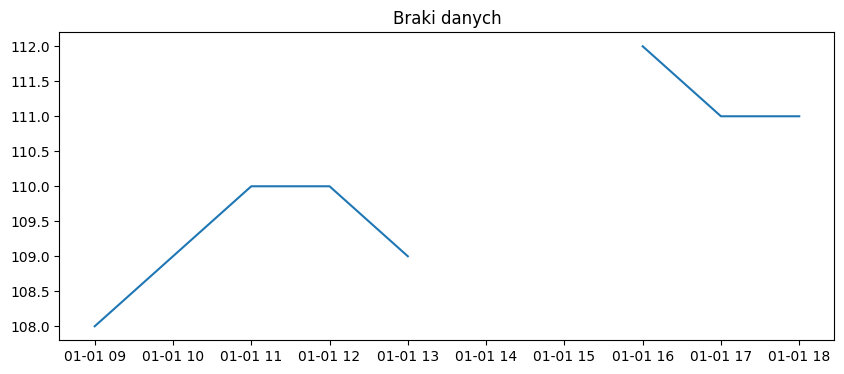

In [50]:
plt.figure(figsize = (10, 4))
plt.title('Braki danych')
plt.plot(df.price)

In [51]:
import plotly.express as px
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Szeregi czasowe')

In [63]:
import plotly.express as px
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Szeregi czasowe')

In [73]:
import plotly.express as px
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Szereg czasowy')

In [81]:
import plotly.express as px
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Szereg czasowy')

In [83]:
import plotly.express as px
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].interpolate()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [85]:
import plotly.express as px
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Szereg czasowy')